In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 8
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1000
The mean of E is: 0.1
The mean of I is: 0.5
-------------------------------------


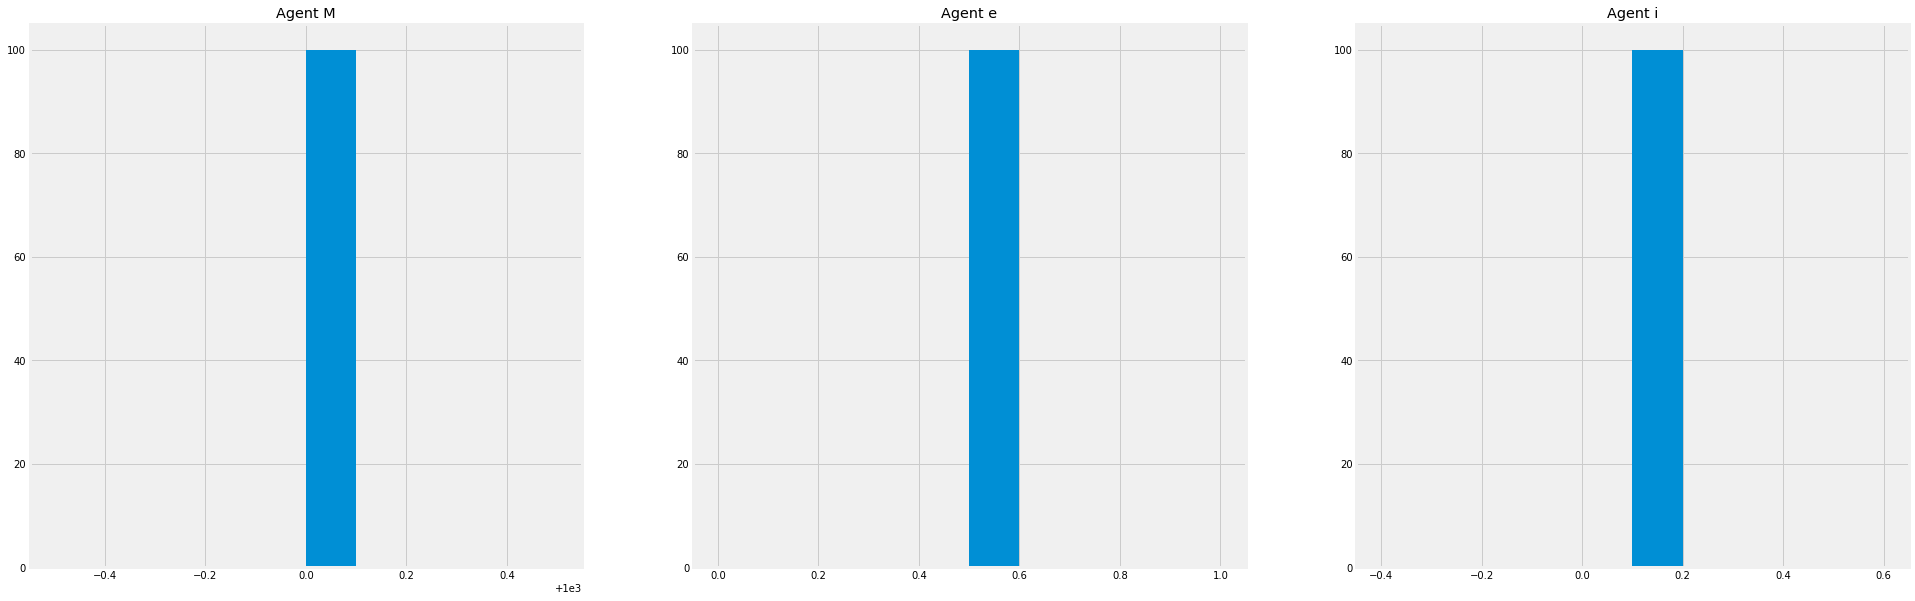

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 450.0, Temptation: 500.0, Sucker: -50.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 450.0, Temptation: 500.0, Sucker: -50.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 450.0, Temptation: 500.0, Sucker: -50.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 450.0, Temptation: 500.0, Sucker: -50.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 450.0, Temptation: 500.0, Sucker: -50.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 450.0, Temptation: 500

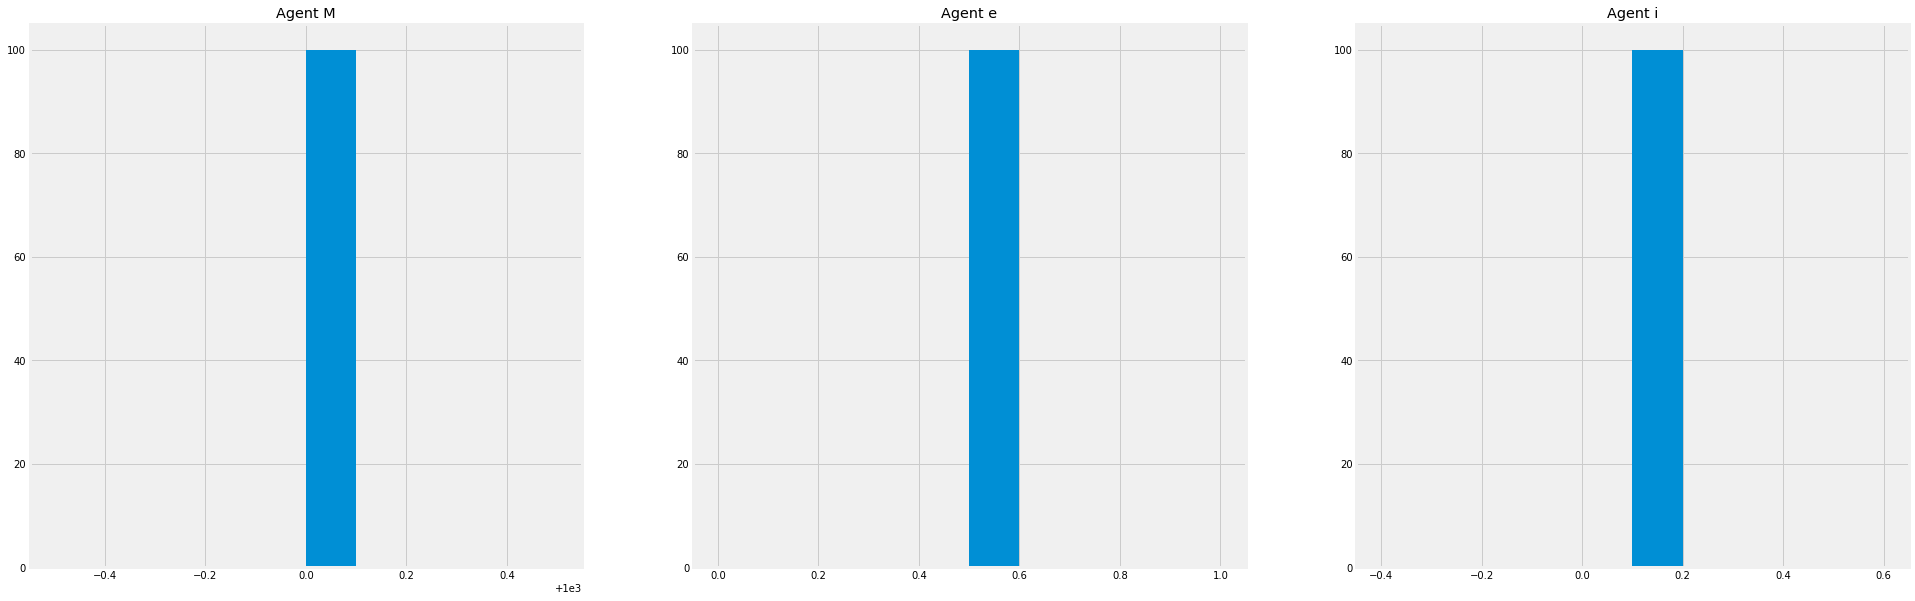

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 0.00001]
E = [0.5, 0.00001]
I = [0.1, 0.00001]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)
check_parameters(agents) #correct result because homogenous = True

Tournament has started...
Tournament has ended. The simulation took 16 minutes.
    S.D.  Counts
0    0.5     261
1    0.6     266
2    0.7     243
3    0.8     216
4    0.9     223
5    1.0     212
6    1.1     224
7    1.2     189
8    1.3     174
9    1.4     170
10   1.5     133
11   1.6     102
12   1.7      89
13   1.8      67
14   1.9      51
15   2.0      36
16   2.1      26
17   2.2      20
18   2.3      10
19   2.4       7
20   2.5       4
21   2.6       1
22   2.7       0
23   2.8       0
24   2.9       0
25   3.0       0


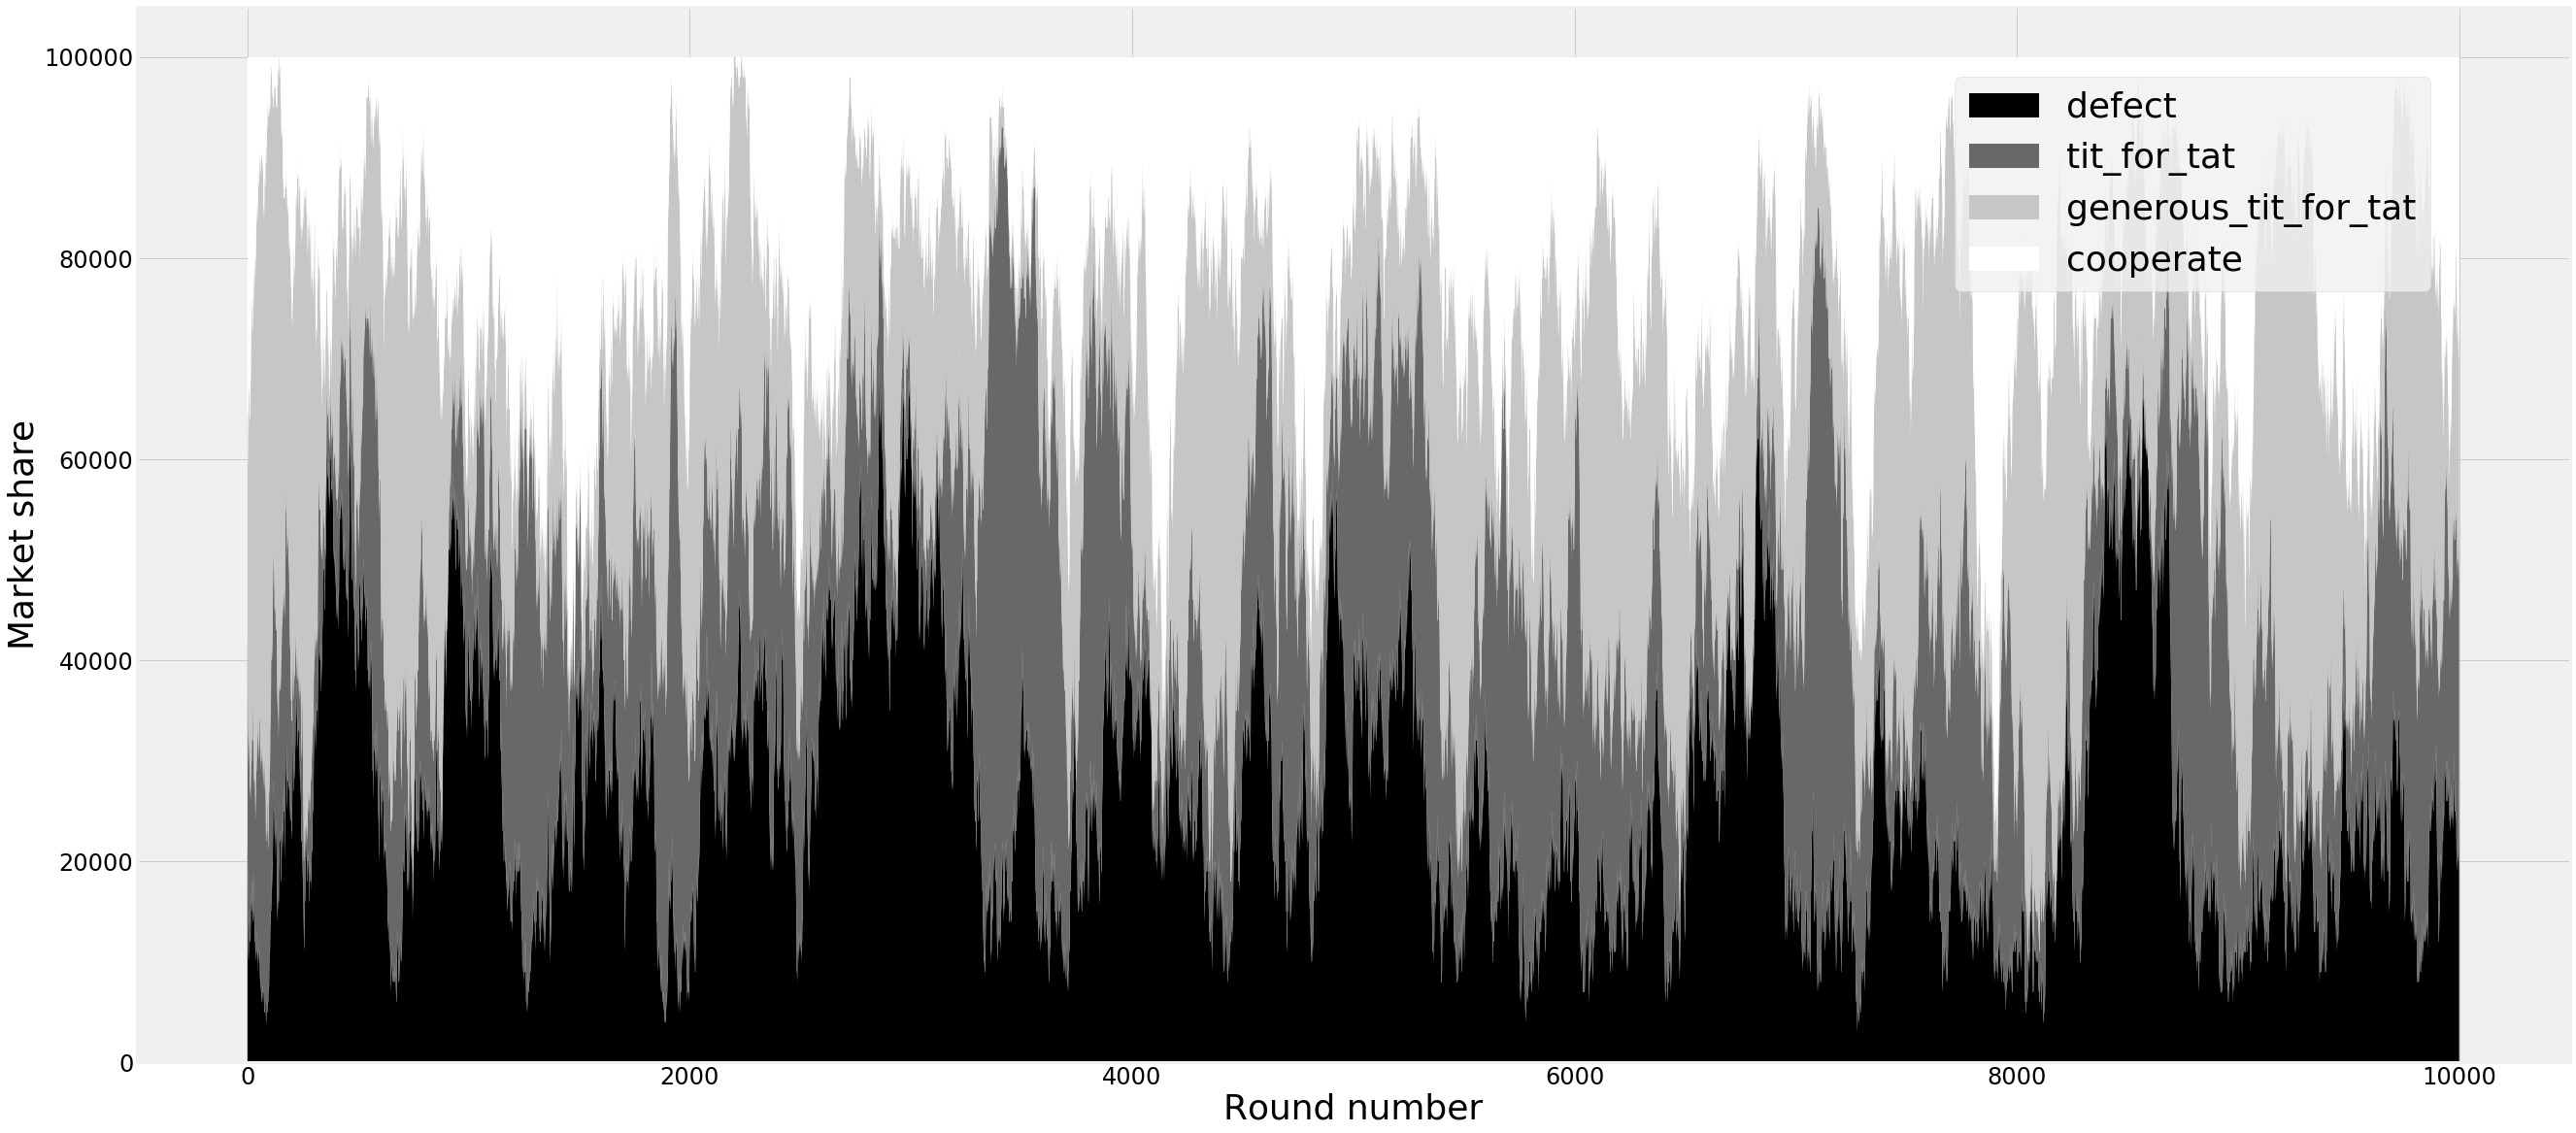

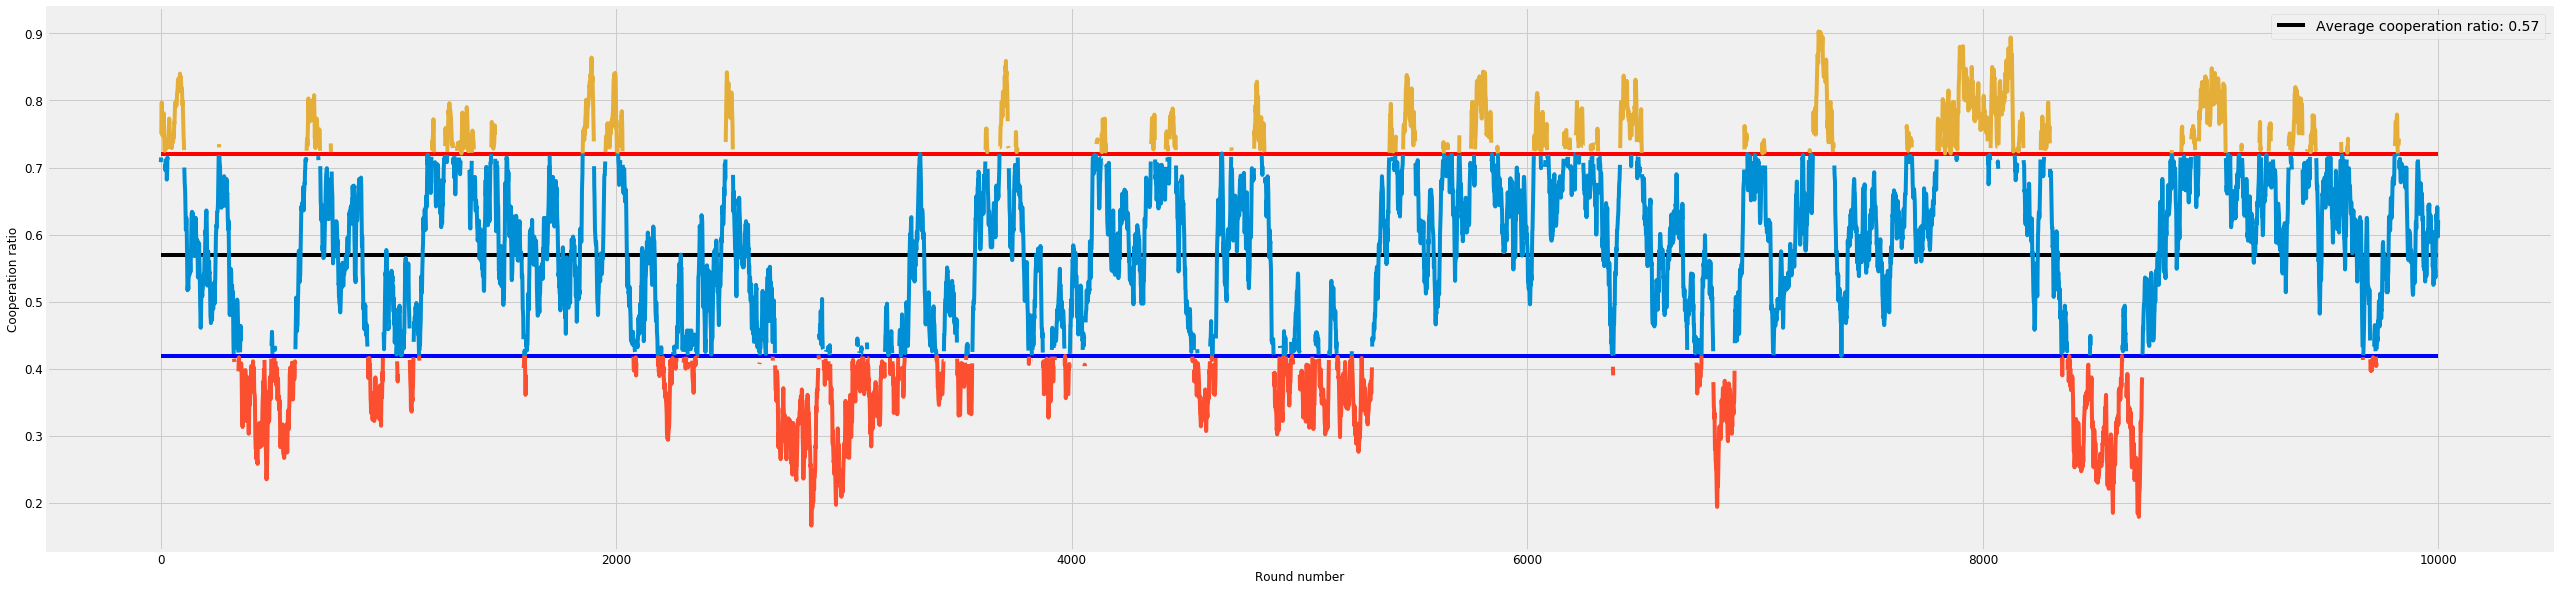

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_mE", seed = str(seed))